In [0]:
!git clone https://github.com/saisriteja/cervical_cancer.git 

Cloning into 'cervical_cancer'...
remote: Enumerating objects: 22, done.
remote: Total 22 (delta 0), reused 0 (delta 0), pack-reused 22
Unpacking objects: 100% (22/22), done.


In [0]:
def getdata(name):
  pickle_in = open(name,"rb")
  X = pickle.load(pickle_in)
  return X

In [0]:
import pickle
type1=getdata('/content/cervical_cancer/smear dataset/normal_superficiel.pickle')
type2=getdata('/content/cervical_cancer/smear dataset/normal_intermediate.pickle')
type3=getdata('/content/cervical_cancer/smear dataset/normal_columnar.pickle')
type4=getdata('/content/cervical_cancer/smear dataset/light_dysplastic.pickle')
type5=getdata('/content/cervical_cancer/smear dataset/moderate_dysplastic.pickle')
type6=getdata('/content/cervical_cancer/smear dataset/severe_dysplastic.pickle')
type7=getdata('/content/cervical_cancer/smear dataset/carcinoma_in_situ.pickle')

In [0]:
import cv2

In [0]:
normal = [type1,type2,type3]
abnormal = [type4,type5,type6,type7]

complete_data = []

dim = (32,32)

for type_id in normal:
  for img in type_id:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    complete_data.append([img,0])
for type_id in abnormal:
  for img in type_id:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    complete_data.append([img,1])

In [0]:
 from random import shuffle
shuffle(complete_data)

In [0]:
X = []
y = []
for img,cat in complete_data:
    X.append(img)
    y.append(cat)
print('Normal samples:'.ljust(20) , y.count(0))
print('Abnormal samples:'.ljust(20) , y.count(1))


Normal samples:      242
Abnormal samples:    675


In [0]:
import numpy as np

In [0]:
X = np.array(X).reshape(len(complete_data),32*32)
X = X/255

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.33, random_state=42)

In [0]:
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
no_epoch = 1000
batch_size = 128

In [0]:
def result_analysis(X_test,y_test,model,history,epochs = 1000,results = True):
    if results == True:
        accuracy = model.evaluate(X_test,y_test)[1]*100
        y_pred = model.predict_classes(X_test)
        precision,recall,fscore,_ = precision_recall_fscore_support(y_test, y_pred, average='macro')
        print('\n')
        print('*****'.center(50,'-'))
        print("accuracy".ljust(15,'-'),int(accuracy),'%')
        print('precision'.ljust(15,'-'),int(precision*100),'%')
        print('recall'.ljust(15,'-'),int(recall*100),'%')
        print('fscore'.ljust(15,'-') ,int(fscore*100),'%')
        print('*****'.center(50,'-'))
        print('\n')

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    ep = epochs
    epochs = [epoch for epoch in range(epochs)]

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
    fig.suptitle('Loss and accuracy')

    ax1.plot(epochs, loss[:ep], 'm', label='Training loss')
    ax1.plot(epochs, val_loss[:ep], 'b', label='Validation loss')
    ax1.set(xlabel='Epochs', ylabel='Loss')
    ax1.legend(loc="upper right")

    ax2.plot(epochs, acc[:ep], 'r', label='Training acc')
    ax2.plot(epochs, val_acc[:ep], 'g', label='Validation acc')
    ax2.set(xlabel='Epochs', ylabel='Loss')
    ax2.legend(loc="lower right")
    plt.show()


#Tuning Layers Sizes 

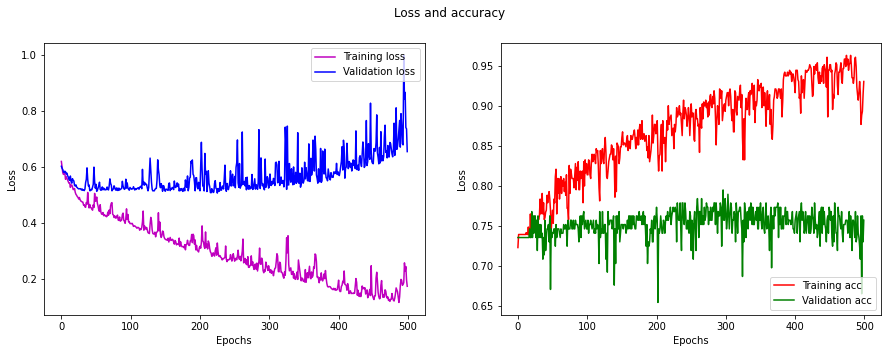

In [0]:
modelsmall = models.Sequential()
modelsmall.add(layers.Dense(64, activation='relu',input_shape=(1024,)))
modelsmall.add(layers.Dense(64, activation='relu'))
modelsmall.add(layers.Dense(1, activation='sigmoid'))
modelsmall.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = modelsmall.fit(X_train, y_train, epochs=no_epoch, batch_size=batch_size,validation_split = 0.3, shuffle=True, verbose=0)
result_analysis(X_test,y_test,modelsmall,history,epochs = 500,results = False)

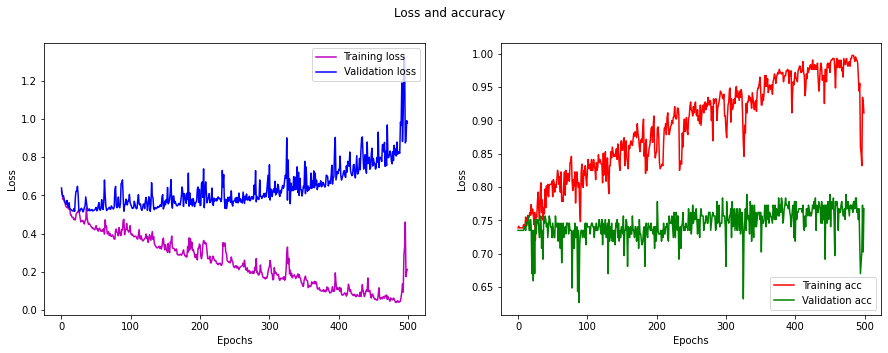

In [0]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu',input_shape=(1024,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelF = model.fit(X_train, y_train, epochs=no_epoch, batch_size=batch_size,validation_split = 0.3, shuffle=True, verbose=0)
result_analysis(X_test,y_test,model,modelF,epochs = 500,results = False)

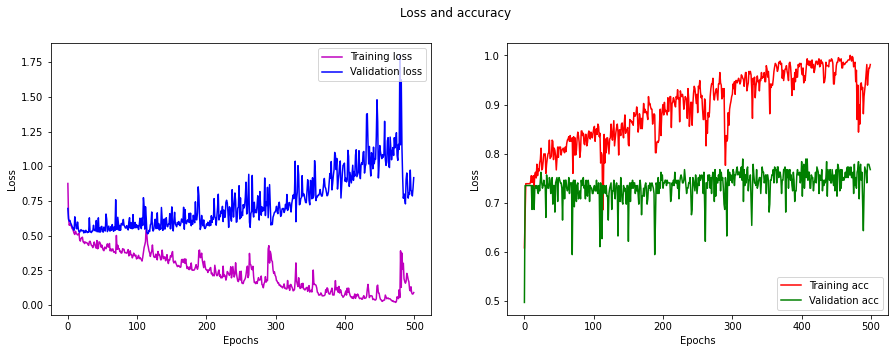

In [0]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu',input_shape=(1024,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelF = model.fit(X_train, y_train, epochs=no_epoch, batch_size=batch_size,validation_split = 0.3, shuffle=True, verbose=0)
result_analysis(X_test,y_test,model,modelF,epochs = 500,results = False)

#Regularization

In [0]:
from keras import regularizers

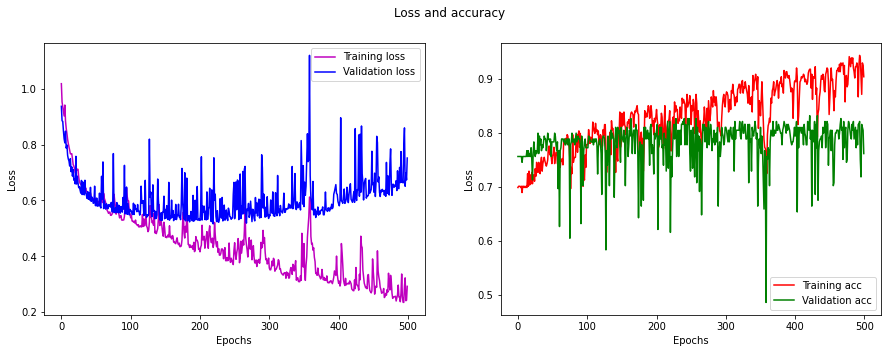

In [0]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(1024,)))
model.add(layers.Dense(128,kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelF = model.fit(X_train, y_train, epochs=no_epoch, batch_size=batch_size,validation_split = 0.3, shuffle=True, verbose=0)
result_analysis(X_test,y_test,model,modelF,epochs = 500,results = False)

#Dropout

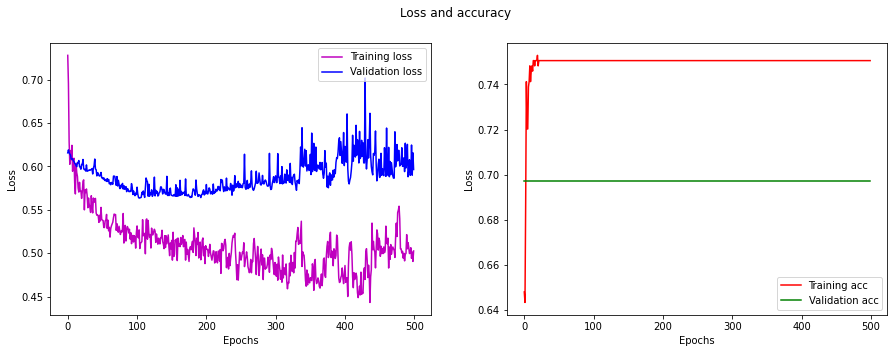

In [0]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu',input_shape=(1024,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelF = model.fit(X_train, y_train, epochs=no_epoch, batch_size=batch_size,validation_split = 0.3, shuffle=True, verbose=0)
result_analysis(X_test,y_test,model,modelF,epochs = 500,results = False)

#Weight initialization

In [0]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
print(class_weights)

[1.88343558 0.68070953]


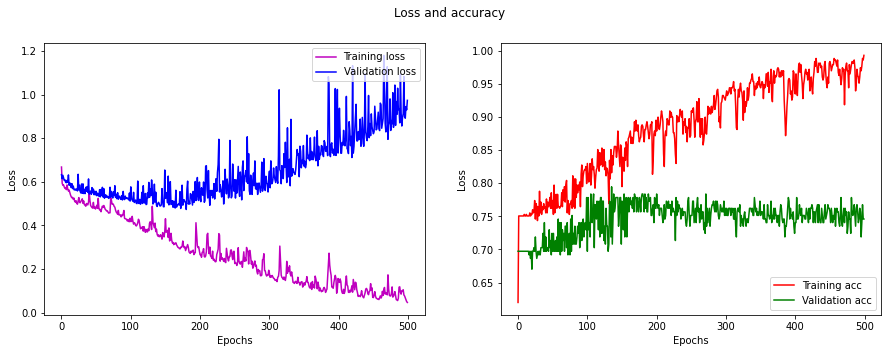

In [0]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu',input_shape=(1024,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelF = model.fit(X_train, y_train, epochs=no_epoch, batch_size=batch_size,validation_split = 0.3, shuffle=True,class_weight=class_weights ,verbose=0)
result_analysis(X_test,y_test,model,modelF,epochs = 500,results = False)